In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.special import expit
%matplotlib inline



## 2-d example of ordered Gaussian with 2 cutpoints

<font size="5">

\begin{align}
p(y_i|f(x)) = \Phi(z_1^i)-\Phi(z_2^i);\\
\end{align}
    

\begin{align}
z_1^i = (b_{y_i} - f(x))/\sigma\\
z_2^i = (b_{y_{i-1}} - f(x))/\sigma
\end{align}

\begin{align}
    \Phi = NormalCDF
\end{align}
</font>

\begin
p(y_i|f(x_i)) = \Phi(z_1^i)-\Phi(z_2^i) \\
z_1^i = (b_y_i - f(x_i))/\sigma
$


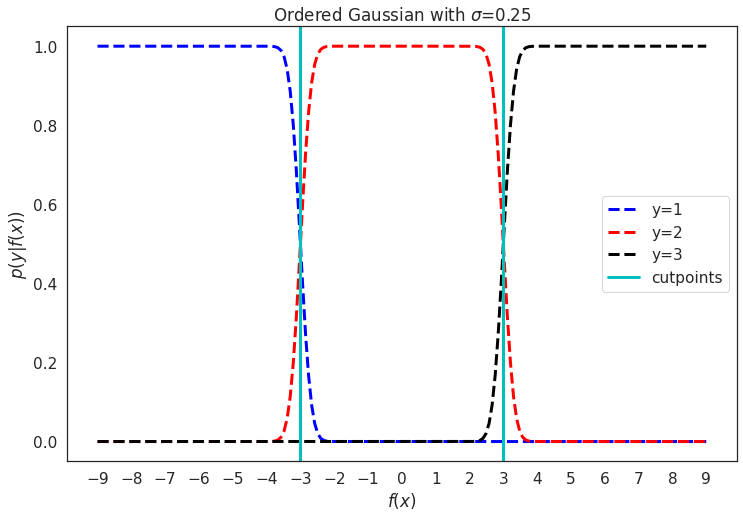

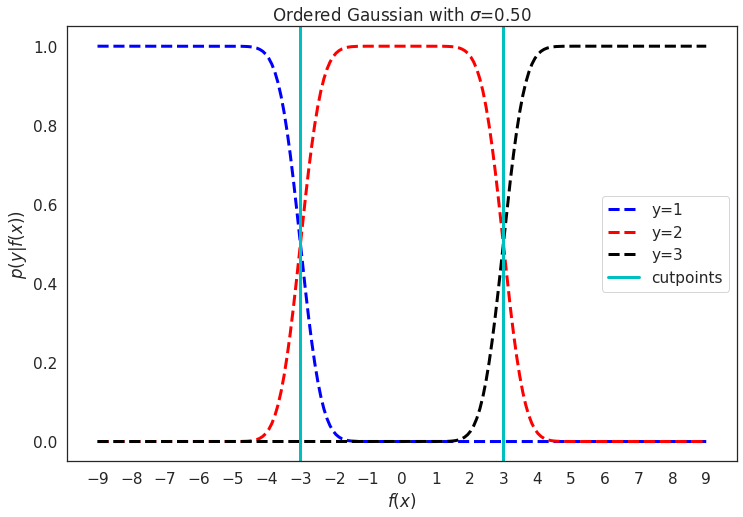

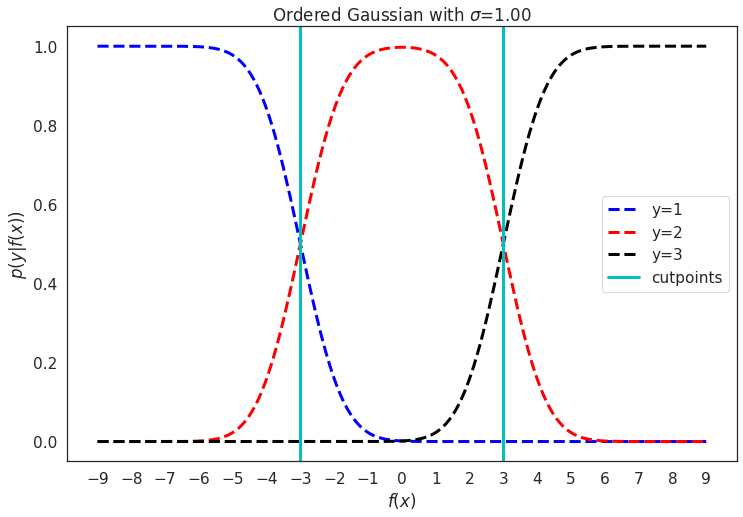

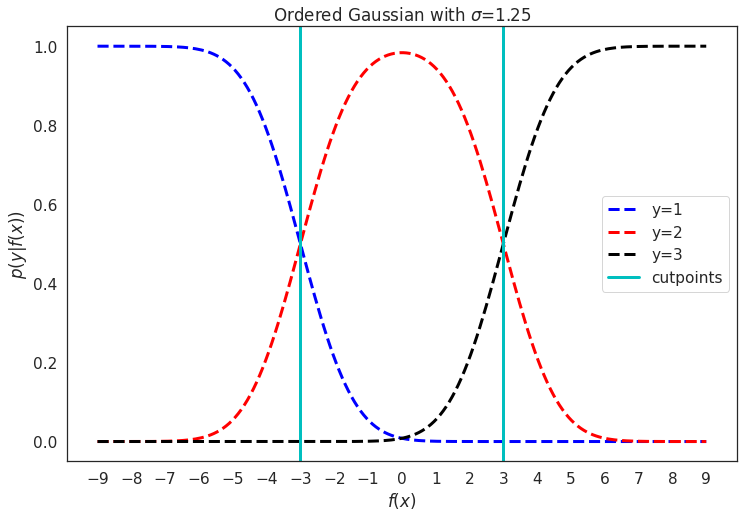

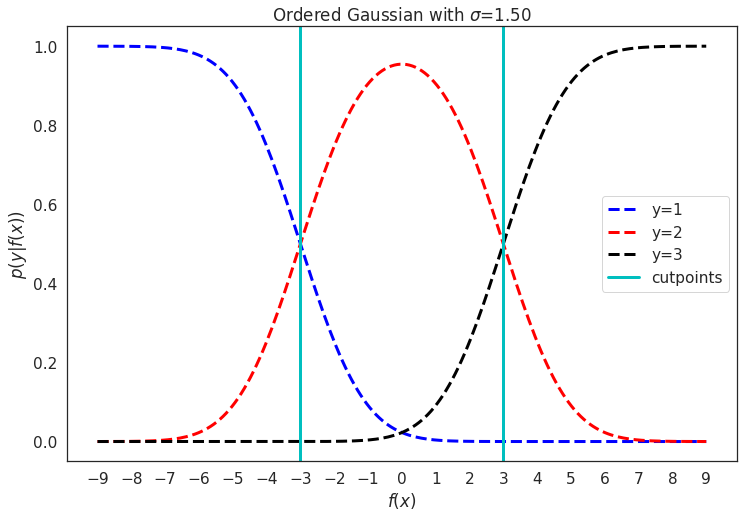

In [62]:
G = 200
f_x = np.linspace(-9, 9, G)
cutpoints = np.array([-np.inf, -3, 3, np.inf])
n_classes = len(cutpoints)-1

sigma_list = [0.25, 0.5, 1, 1.25, 1.5]
for sigma in sigma_list:
# sigma = 1

    p_y = np.zeros((len(f_x), n_classes))

    for ii in range(n_classes):
        z_1 = (cutpoints[ii+1]-f_x)/sigma
        z_2 = (cutpoints[ii]-f_x)/sigma
        p_y[:, ii] = norm.cdf(z_1, loc=0, scale=1) - norm.cdf(z_2, loc=0, scale=1)

    ## Plot
    f, axs = plt.subplots(1, 1, figsize=(12, 8))
    sns.set_context('notebook', font_scale=1.4)
    sns.set_style('white')
    lw=3
    axs.plot(f_x, p_y[:, 0], 'b--', label='y=1', linewidth=lw)
    axs.plot(f_x, p_y[:, 1], 'r--', label='y=2', linewidth=lw)
    axs.plot(f_x, p_y[:, 2], 'k--', label='y=3', linewidth=lw)
    axs.set_xlabel(r'$f(x)$')
    axs.set_ylabel(r'$p(y|f(x))$')
    axs.axvline(-3,  color='c', linewidth=lw)
    axs.axvline(3,  color='c', label='cutpoints', linewidth=lw)
    axs.set_xticks(np.linspace(-9, 9, 19))
    axs.set_title(r'Ordered Gaussian with $\sigma$=%.2f'%sigma)
    axs.legend()
    plt.show()

## 2-d example of ordered logistic with 2 cutpoints

<font size="5">

\begin{align}
p(y_i|f(x)) = \sigma(z_1^i)-\sigma(z_2^i);\\
\end{align}
    

\begin{align}
z_1^i = \sigma(b_{y_i} - f(x))\\
z_2^i = \sigma(b_{y_{i-1}} - f(x))
\end{align}

\begin{align}
    \sigma = Sigmoid
\end{align}
</font>

In [57]:

p_y_ol = np.zeros((len(f_x), n_classes))

for ii in range(n_classes):
    z_1 = (cutpoints[ii+1]-f_x)/sigma
    z_2 = (cutpoints[ii]-f_x)/sigma
    p_y_ol[:, ii] = expit(z_1) - expit(z_2)

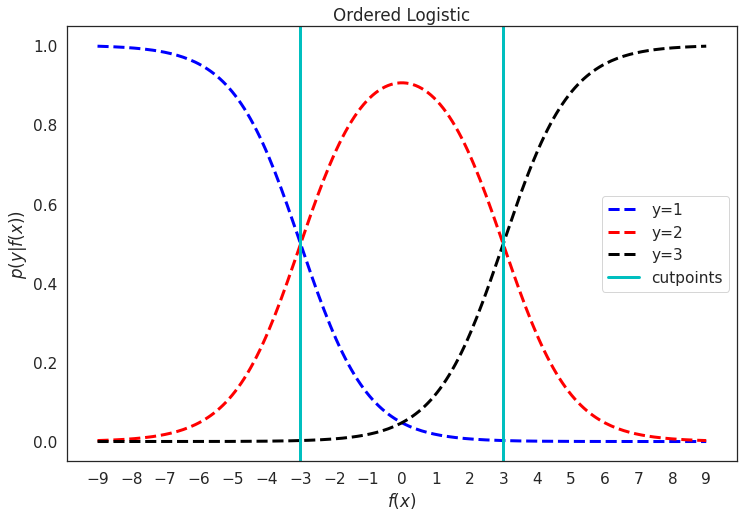

In [58]:
f, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.set_context('notebook', font_scale=1.4)
sns.set_style('white')
lw=3
axs.plot(f_x, p_y_ol[:, 0], 'b--', label='y=1', linewidth=lw)
axs.plot(f_x, p_y_ol[:, 1], 'r--', label='y=2', linewidth=lw)
axs.plot(f_x, p_y_ol[:, 2], 'k--', label='y=3', linewidth=lw)
axs.set_xlabel(r'$f(x)$')
axs.set_ylabel(r'$p(y|f(x))$')
axs.axvline(-3,  color='c', linewidth=lw)
axs.axvline(3,  color='c', label='cutpoints', linewidth=lw)
axs.set_xticks(np.linspace(-9, 9, 19))
axs.set_title('Ordered Logistic')
axs.legend()
plt.show()